In [50]:

import lib.flow_of_passengers as greader
import lib.simulation.prepare_graph as prepare_graph


graph = greader.read_graph_w_extrapolated_flow()
prepare_graph.add_seir_states(graph)


linreg = a*x + b = 1.4087903153529389*x+10.32374918819301


In [226]:
import numpy as np
import numpy.linalg as npl

node_data = graph.nodes['ARN']

node_data['susceptible'] = node_data['population'] * 0.8
node_data['exposed'] = node_data['population'] * 0.15
node_data['infectious'] = node_data['population'] * 0.00

x_old = np.array([
            node_data['susceptible'],
            node_data['exposed'],
            node_data['infectious'],
            node_data['recovered']
        ])

omega = 0

# natural death 255 days
mu = 1 / 255

# natural birth 115 days
# nu = 1 / 115
# lets keep the number of people constant
nu = mu

# latent period 1.2 days
sigma = 1 / 2

# infected period
gamma = sigma

# transmission coefficient 1.66 days
beta = 1 / 4

h = 0.1

res = list()

steps = 200

In [227]:


for i in range(steps):
    # Rate of loosing immutity (from death)

    A = 1 + mu * h + (beta * h * x_old[2]) / node_data['population']
    B = omega * h
    C = 1 + (mu + sigma) * h
    D = 1 + (mu + gamma) * h
    G = sigma * h
    H = (beta * h * x_old[2]) / node_data['population']
    J = 1 + (mu + omega) * h
    F = gamma * h

    M_x = np.array([[A, 0, 0 , -B], 
                    [-H, C, 0, 0],
                    [0, -G, D, 0],
                    [0, 0, -F, J]])

    D = (np.identity(4) 
        + ((nu * h) / 1 + (mu - nu) * h) 
        * np.array([[1, 1, 1 , 1], 
                    [0, 0, 0, 0],
                    [0, 0, 0, 0],
                    [0, 0, 0, 0]]))

    x_new = np.matmul(npl.inv(M_x), D).dot(x_old)

    # print(npl.inv(M_x))
    # print(D)
    # print(np.matmul(npl.inv(M_x), D))
    # print(x_old)
    # print(x_new)
    # print(sum(x_old))
    # print(sum(x_new))
    res.append(x_new)


    
    x_old = x_new

<IPython.core.display.Javascript object>


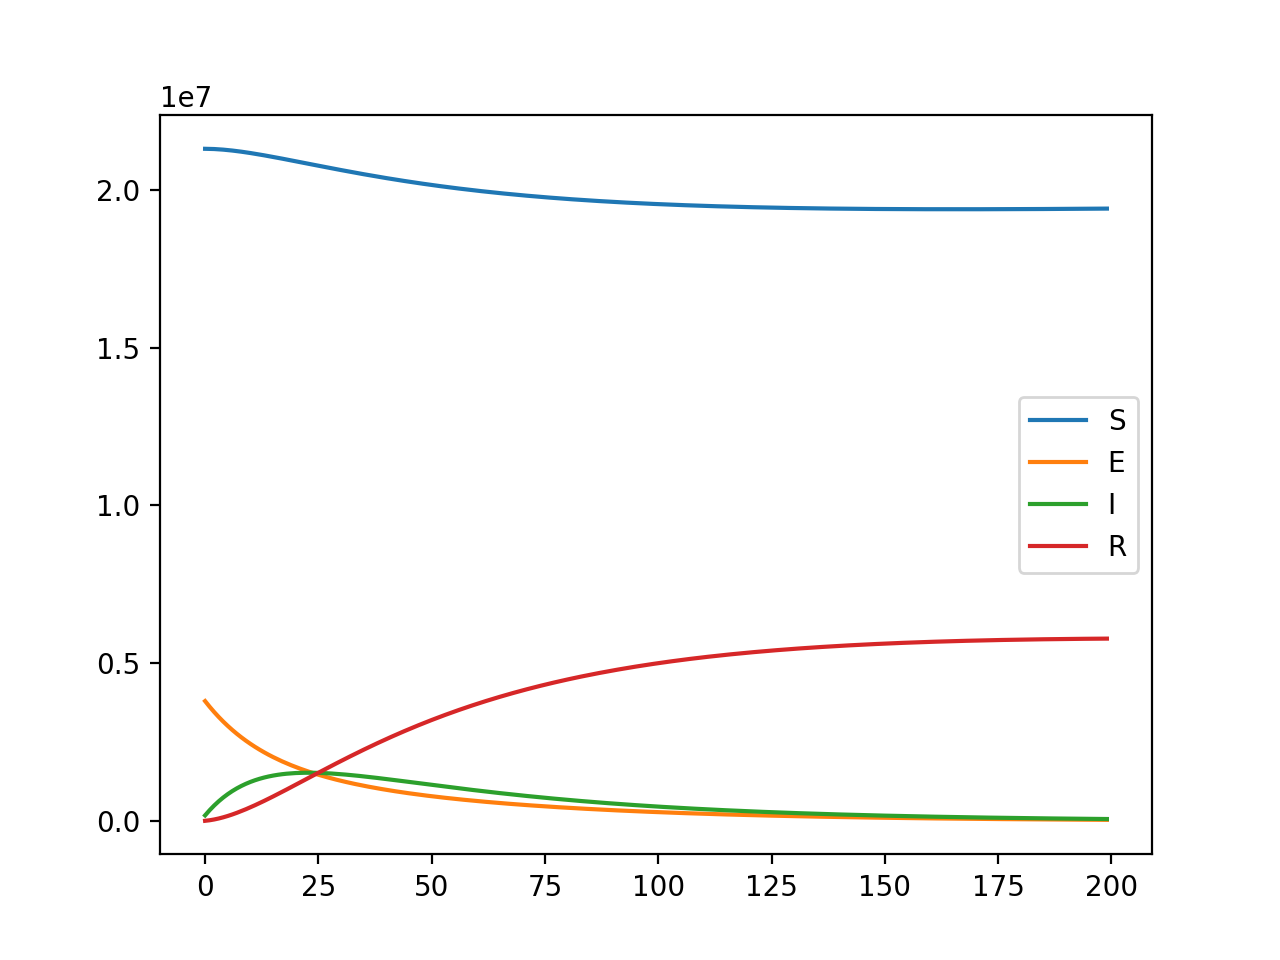

In [228]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib notebook

extracted = [x for x in zip(*res)]

plt.plot(range(steps), extracted[0], label="S")
plt.plot(range(steps), extracted[1], label="E")
plt.plot(range(steps), extracted[2], label="I")
plt.plot(range(steps), extracted[3], label="R")
plt.legend()



In [222]:
with open("less-viral-seir.dat", "w") as f:
    for i in range(steps):
        f.write(f"{i * h} {res[i][0]} {res[i][1]} {res[i][2]} {res[i][3]}\n")